<a href="https://colab.research.google.com/github/jaseragha/Prediction-of-Product-Sales/blob/main/Project_1_Part_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in COlab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/coding-dojo-data-science/Project1_Exemplar/blob/main/DS_Salaries.ipynb)

## Data Science Salary Insights

Sherlin Whaley

#<a href="https://colab.research.google.com/github/coding-dojo-data-science/Project1_Exemplar/blob/main/DS_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Parts 1 & 2

Part 1:

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')
fpath = '/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)

Mounted at /content/drive


In [4]:

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df2 = df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

How many rows/columns:

In [8]:
df.shape


(8523, 12)

 - There are 8523 rows and 12 columns

Checking the data types:

In [9]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


### Duplicated Data
Checking for duplicated data:

In [10]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

np.int64(0)

- Checking to make sure duplicates were dropped.

### Missing Values
Checking for missing values:

In [12]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Identifying % of missing data (optional)

In [13]:
df.isna().sum() / len(df) * 100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000




- Missing Values:
  - There are `1463 ` missing values in the `Item_Weight` column. (17.17%)
  - There are `2410 ` missing values in the `Outlet_Size` column. (28.28%)



In [14]:
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(
    lambda x: x.fillna(x.mean())
)

df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

mode_outlet_size = df.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

def fill_outlet_size(row):
    if pd.isna(row['Outlet_Size']):
        return mode_outlet_size[row['Outlet_Type']]
    else:
        return row['Outlet_Size']

df['Outlet_Size'] = df.apply(fill_outlet_size, axis=1)

print(df.isna().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [15]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


### Fixing Data Types

- We will now address the data types and make sure that they match the data dictionary.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
categorical_cols = [
    'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 451.3+ KB


In [18]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].astype(str).replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
df['Item_Fat_Content'] = df['Item_Fat_Content'].astype('category')


df['Item_Fat_Content'].value_counts()


,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [19]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.645008,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Project 1 - Part 3

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

Please feel free to add more than the minimum. Remember this is your chance to display your skills!

## Exploratory Visuals & Analysis

- Note: There are many different ways students could tackle this EDA. Additionally, there are more advanced ways to plot the data.

- Approaches
We will go Column-by-Column with the EDA using a function (plus markdown interpretations for each)

In [20]:
# Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 451.2+ KB


Histograms to view the distributions of numerical features in your dataset.

In [21]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

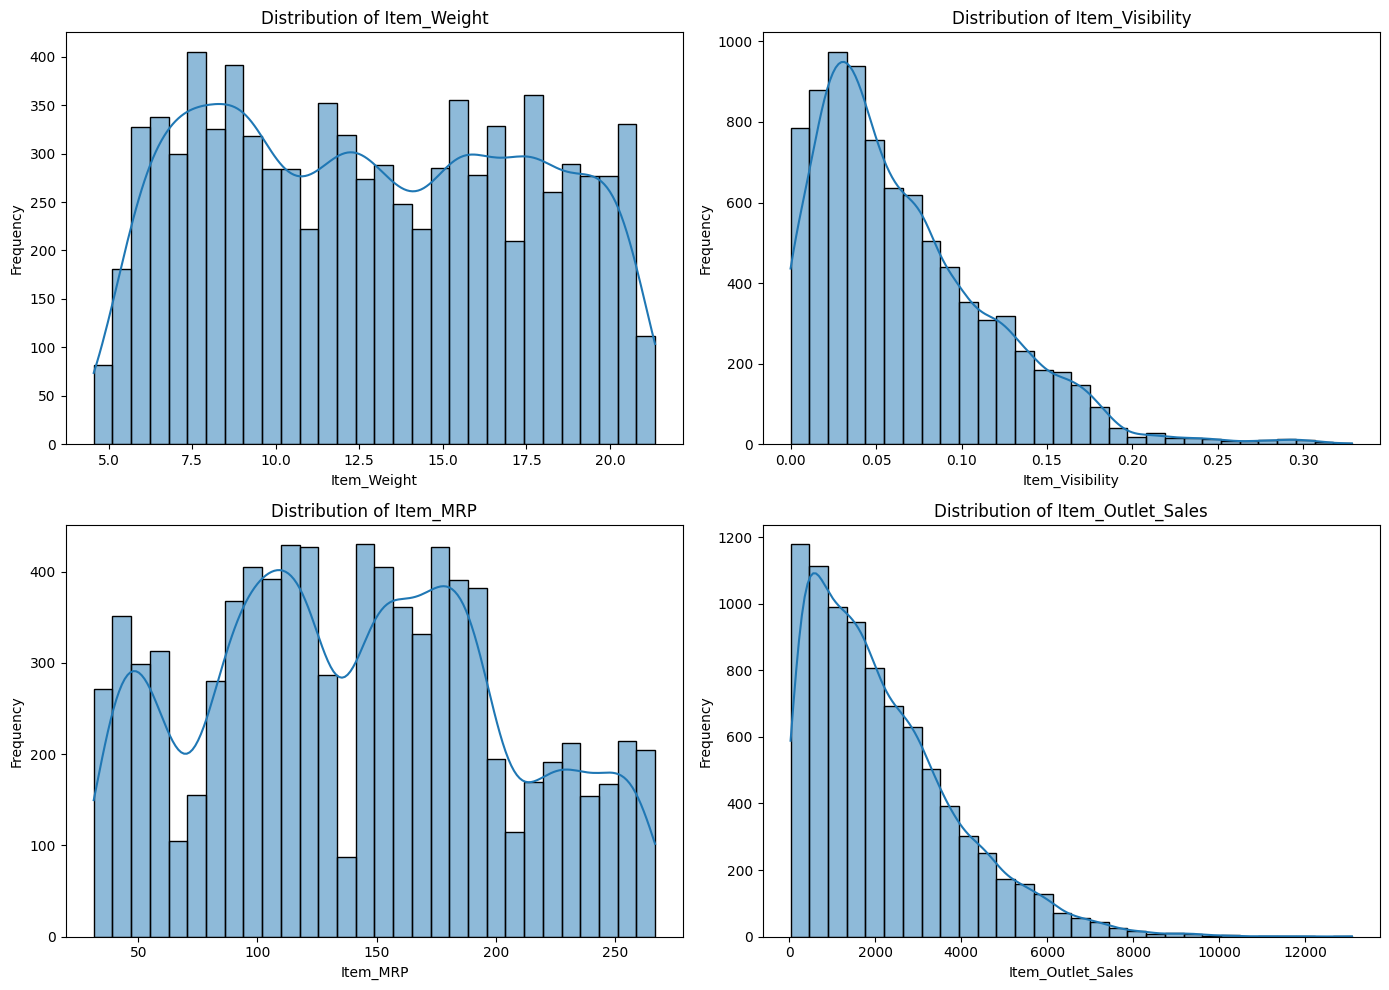

In [22]:
# List of numerical columns
numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Plot histograms
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


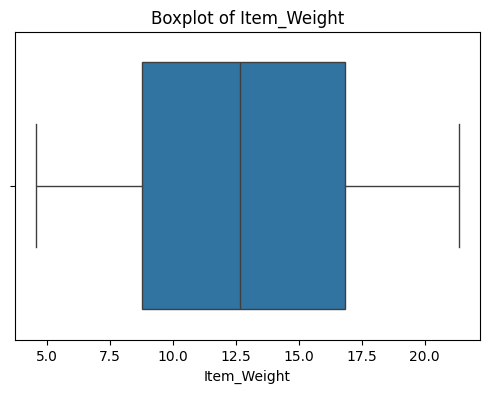

In [23]:
# Boxplot for Item_Weight
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Item_Weight'])
plt.title('Boxplot of Item_Weight')
plt.xlabel('Item_Weight')
plt.show()


In [ ]:
# Boxplot for Item_Visibility
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Item_Visibility'])
plt.title('Boxplot of Item_Visibility')
plt.xlabel('Item_Visibility')
plt.show()


In [ ]:
# Boxplot for Item_MRP
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Item_MRP'])
plt.title('Boxplot of Item_MRP')
plt.xlabel('Item_MRP')
plt.show()


In [ ]:
# Boxplot for Outlet_Establishment_Year
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Outlet_Establishment_Year'])
plt.title('Boxplot of Outlet_Establishment_Year')
plt.xlabel('Outlet_Establishment_Year')
plt.show()


In [ ]:
# Boxplot for Item_Outlet_Sales
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Item_Outlet_Sales'])
plt.title('Boxplot of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.show()


Countplots to view the frequency of each class of categorial features in your dataset.

In [ ]:
# Countplot for Item_Fat_Content
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Item_Fat_Content')
plt.title('Countplot of Item_Fat_Content')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.show()


In [ ]:
# Countplot for Item_Type
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Item_Type')
plt.title('Countplot of Item_Type')
plt.xlabel('Item_Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Countplot for Outlet_Identifier
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Outlet_Identifier')
plt.title('Countplot of Outlet_Identifier')
plt.xlabel('Outlet_Identifier')
plt.ylabel('Count')
plt.show()


In [ ]:
# Countplot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Outlet_Size')
plt.title('Countplot of Outlet_Size')
plt.xlabel('Outlet_Size')
plt.ylabel('Count')
plt.show()


In [ ]:
# Countplot for Outlet_Location_Type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Outlet_Location_Type')
plt.title('Countplot of Outlet_Location_Type')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Count')
plt.show()


In [ ]:
# Countplot for Outlet_Type
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Outlet_Type')
plt.title('Countplot of Outlet_Type')
plt.xlabel('Outlet_Type')
plt.ylabel('Count')
plt.show()


Heatmap to view the correlation between features.


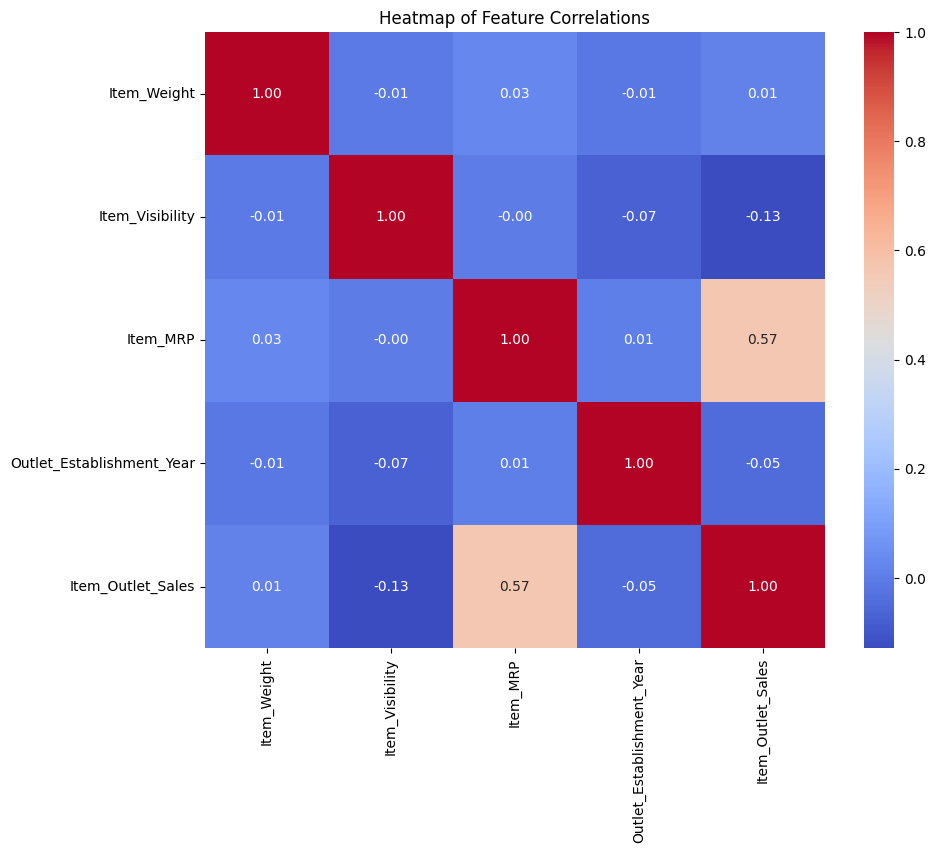

In [26]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()
